In [25]:
# 911 Calls Capstone Project

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Reading the csv file as a dataframe
df=pd.read_csv('911.csv')

In [27]:
# Checking the data types and size of the rows and columns of the data
df.info()

# Checking 3 rows of data
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [28]:
# Checking the top 5 zipcodes for 911 calls

df['zip'].value_counts().head(5)


19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [29]:
# Checking for the top 5 townships (twp) for the 911 calls

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [30]:
# Checking the 'title' column to see how many unique title codes there are
df['title'].nunique()

110

In [31]:
# Creating a new feature/ column of 'Reasons' from the department

df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [32]:
# Checking for the most common Reason for 911 call based of the 'Reason' column
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

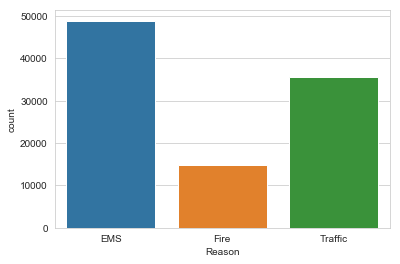

In [33]:
# Using seaborn to create a countplot of 911 calls by Reason
sns.countplot(x='Reason', data=df)
# palette='viridis'

In [34]:
# Converting the timeStamp to DateTime object to create the columns below
# Creating columns based on Hour, Month, and Day of the Week. To later create a graph day of week and 
# month

df['timeStamp'] = pd.to_datetime(df['timeStamp']);
df['timeStamp'].iloc[0].dayofweek

df['Hour']=df['timeStamp'].apply(lambda x: x.hour)
df['Month']=df['timeStamp'].apply(lambda x: x.month)
df['Day of Week']=df['timeStamp'].apply(lambda x: x.dayofweek)
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [35]:
# mapping for the weeks
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap.values()

df['Day of Week']=df['Day of Week'].map(dmap)
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


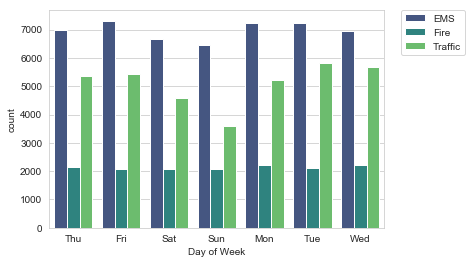

In [36]:
# Creating a countplot of the Day of Week columns for the Reason column

sns.countplot(x='Day of Week',data=df,hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

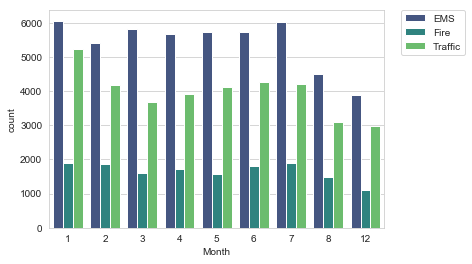

In [37]:
# Creating a countplot of the 'Month', similar to the one previously

sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

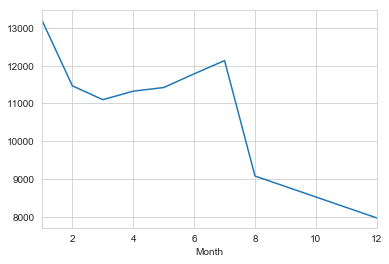

In [39]:
# Due to the some months missing, we need to plot the information in a different way.


byMonth = df.groupby('Month').count()
byMonth.head()

# A simple line plot to show the count of calls per month
byMonth['Day of Week'].plot()

# byMonth['lat'].plot()

# Peak of calls seems to be at July and the calls seems to drop after this month

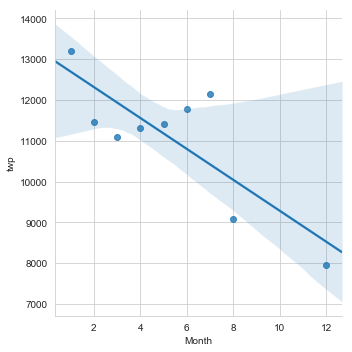

In [40]:
# Creating a linear fit on the number of calls per month.

byMonth['Month'] = byMonth.index
# byMonth.head()
sns.lmplot(x='Month',y='twp',data=byMonth)

# sns.lmplot(x='Month',y='twp',data=byMonth.reset_index)

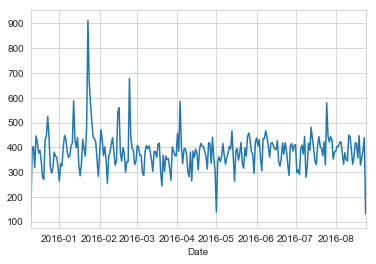

In [43]:
# Creating a count plot of 911 calls per date

df['Date']=df['timeStamp'].apply(lambda x: x.date())
df.head(3)

gg = df.groupby('Date').count()['twp']
gg.plot()

#plt.tight_layout()

In [44]:
# Now checking the count plots for three different reson for 911 calls for each date

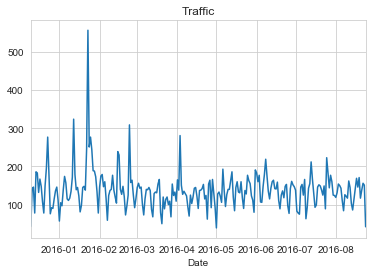

In [45]:
# Reason = 'Traffic'
gg=df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
gg

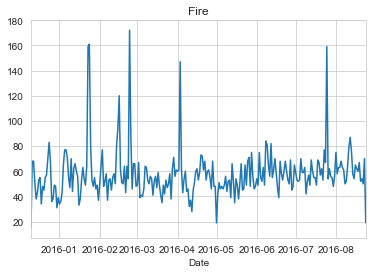

In [47]:
# Reason = 'Fire'
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.show()

Text(0.5, 1.0, 'EMS')

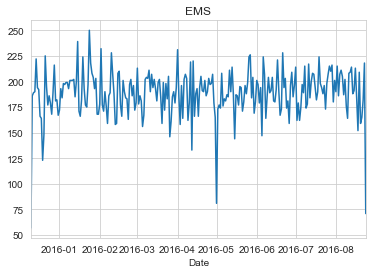

In [48]:
# Reason = 'EMS' # EMS: BACK PAINS/INJURY
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

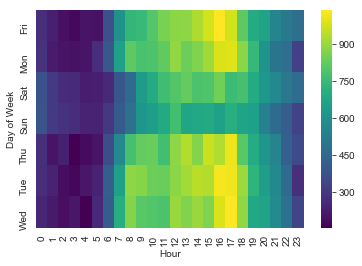

In [50]:
# Now creating heatmaps to check for more details for the days of week and hours

#df.index('Day of Week')
# byDay['Day'] = byMonth.index
# df.head()
# Group by two of them 'Day of Week' and 'Hour' [Day of week first then Hours second]
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

# plt.figure(figsize(12,6))
sns.heatmap(dayHour,cmap='viridis')

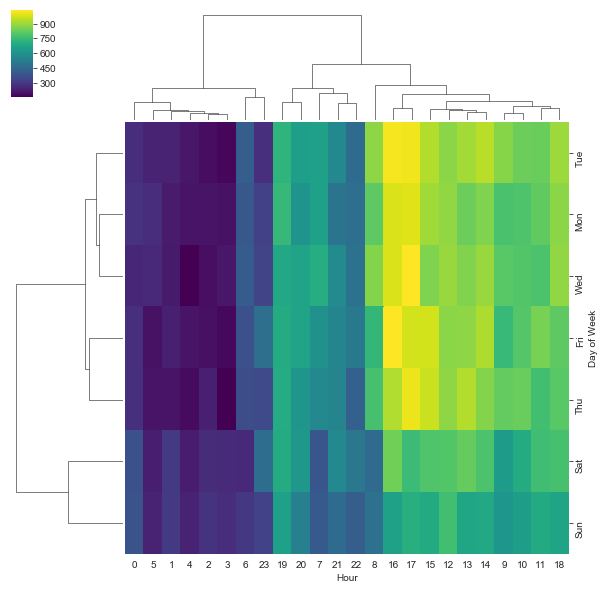

In [52]:
# Creating a cluster map for day and Hour

sns.clustermap(dayHour,cmap='viridis')


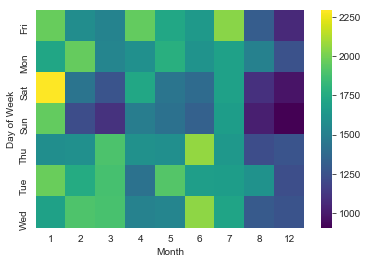

In [53]:
# Doing the same but for the Month as the coulmn with day of week
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

sns.heatmap(dayMonth, cmap='viridis')

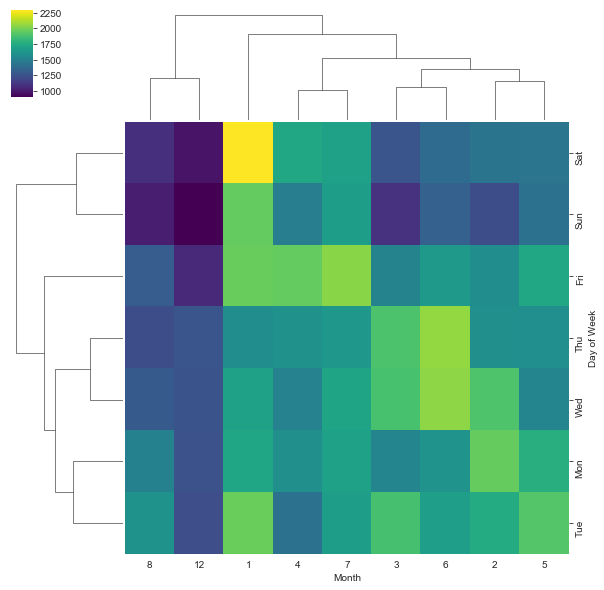

In [55]:
# clustermap for day and month 
sns.clustermap(dayMonth,cmap='viridis')